# Principle Component Analysis For Dimensionality Reduction

In [35]:
import pandas as pd
import numpy as np
from floridaman import data_cleaning
from sklearn.decomposition import PCA

## Load in raw data

In [36]:
raw_data = data_cleaning.load('null_transformed')

## Generate imputed/normalized data set

In [37]:
full_data = data_cleaning.drop_columns(raw_data, .4, .4)
balanced_data = data_cleaning.balance(full_data)

full_data = data_cleaning.impute_values(full_data, 5)
balanced_data = data_cleaning.impute_values(balanced_data, 5)

quan_cols= np.array([col for col in full_data.columns if full_data[col].dtypes == 'float'])
test_data = full_data[quan_cols]

## Fit and Run PCA

In [38]:
import plotly.express as px
pca = PCA(n_components='mle')
components = pca.fit_transform(test_data)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    test_data,
    dimensions=quan_cols,
    color=full_data["FAILURETYPE"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

## Plotting EignenValues

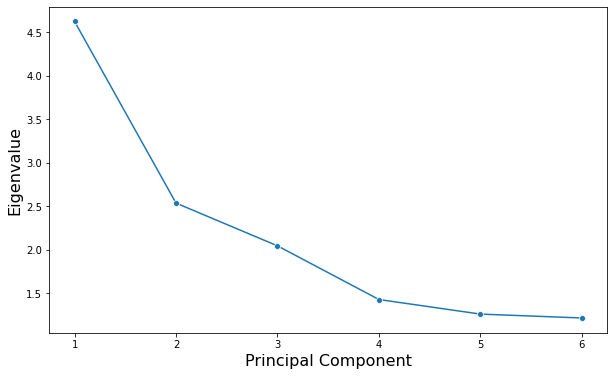

In [39]:
import prince
import matplotlib.pyplot as plt
import seaborn as sns
pca = prince.PCA(
     n_components=6,
     n_iter=10,
     rescale_with_mean=False,
     rescale_with_std=False,
     copy=True,
     check_input=True,
     engine='sklearn',
     random_state=234
 )
pca.fit_transform(test_data)
dset = pd.DataFrame()
dset['pca'] = range(1,7)
dset['eigenvalue'] = pd.DataFrame(pca.eigenvalues_)
plt.figure(figsize=(10,6))
sns.lineplot(x='pca', y='eigenvalue', marker="o", data=dset)
plt.ylabel('Eigenvalue', fontsize=16)
plt.xlabel('Principal Component', fontsize=16)
plt.show()

#### Everything to the left of 2nd elbow, or Principle component 4, is significant

## Plotting principle components to respective proportion of variance in dataset

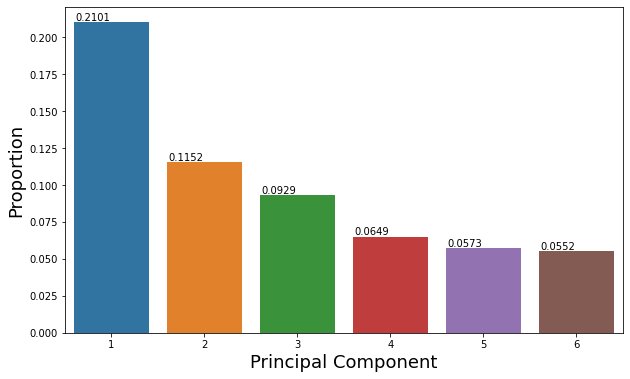

In [40]:
dset = pd.DataFrame()
dset['pca'] = range(1,7)
dset['vari'] = pd.DataFrame(pca.explained_inertia_)

plt.figure(figsize=(10,6))
graph = sns.barplot(x='pca', y='vari', data=dset)
for p in graph.patches:
    graph.annotate('{:.4f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                   ha='center', va='bottom',
                   color= 'black')
plt.ylabel('Proportion', fontsize=18)
plt.xlabel('Principal Component', fontsize=18)
plt.show()

#### 

#### These six principle components make up 60% of the variance in the dataset

## Correlating the Prinicple Components to variables

In [41]:
pca.column_correlations(test_data[quan_cols])

,0,1,2,3,4,5
AVG_DIFFERENTIAL_PRESSURE,0.146702,-0.207981,0.199271,-0.234991,0.463839,-0.483956
AVG_LIQUID_VOLUME,0.804483,-0.445931,0.106726,0.132153,-0.120637,-0.036310
AVG_OIL_VOLUME,0.713668,-0.475125,0.123443,0.034565,-0.127586,-0.072482
AVG_PRESSURE_CASING,0.455142,-0.442846,0.268814,-0.280365,0.384980,-0.160487
AVG_PRESSURE_TUBING,0.467946,-0.351653,0.107887,-0.100332,0.135998,0.242582
AVG_WATERSG,-0.452823,0.071163,-0.045198,0.319472,0.145659,-0.144824
AVG_WATER_VOLUME,0.734436,-0.314414,0.063868,0.216340,-0.086632,0.013090
Fillage,0.297976,-0.093584,-0.001598,-0.343262,-0.086168,0.153824
H2S_CONCENTRATION,0.075767,-0.023101,-0.028687,0.272757,0.201952,0.501179
MAX_INCLINATION,0.386673,0.331447,-0.058473,0.129735,0.385750,-0.042432


#### 0 = PC1, 1 = PC2....
#### So PC1 is really highly correlated with AVG_LIQUID_VOLUME and AVG_OIL_VOLUME, PC2 is mainly correlated with the sideload variables, PC3 is highly correlated with Dog Leg severity